![Winsconsin](img/winsconsin.jpeg)

🩻 **Classification de tumeurs à partir de données médicales**

**Contexte** :
Vous intégrez une équipe de développement en intelligence artificielle dans le cadre d’un projet pilote mené par un consortium de recherche médicale basé dans l’État du Wisconsin, aux États-Unis. Ce projet vise à concevoir des outils numériques d’aide au diagnostic précoce du cancer du sein, en collaboration avec des centres hospitaliers universitaires et des laboratoires d’analyses.

Dans ce cadre, un jeu de données clinique réel — le **Breast Cancer Wisconsin Diagnostic Dataset**, collecté par le Dr. William H. Wolberg au sein de l’université du Wisconsin — a été mis à disposition. Ce dataset contient les caractéristiques de cellules prélevées lors de biopsies mammaires, classées manuellement comme tumeurs bénignes ou malignes.

⸻

🎯 **Objectif** :

Votre mission consiste à concevoir un prototype fonctionnel permettant de prédire la nature de la tumeur à partir de ces données, via un modèle de classification en apprentissage supervisé ([**régression logistique**](https://www.w3schools.com/python/python_ml_logistic_regression.asp)). L’objectif est de démontrer la faisabilité d’un outil automatisé pouvant compléter l’expertise des médecins dans l’analyse de résultats de biopsies.

Construire un modèle de régression logistique capable de prédire la variable `diagnosis` à partir des caractéristiques disponibles dans le fichier ([`data/breast_cancer_wisconsin.csv`](data/breast_cancer_wisconsin.csv)).  

Pour comprendre le dataset, vous pouvez consulter cette page kaggle : https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

- Exploration des données (EDA) :
    - Comprendre les variables (qualitatives/quantitatives)
	- Statistiques descriptives
	- Visualisations (histogrammes, heatmap de corrélation, etc.)
- Préparation des données :
    - Traitement des valeurs manquantes sinécessaire
	- **Transformation des variables catégorielles** (`diagnosis`)
	- **Création éventuelle de nouvelles features**
	- Standardisation si nécessaire
    - Séparation train/test
- Modélisation :
    - Implémentation d’un modèle de régression logistique
- Évaluation du modèle :
    - Calcul des métriques : accuracy, precision, recall, f1-score
    - Matrice de confusion 
    - Bonus : [Étudier AUC - ROC curve](https://www.w3schools.com/python/python_ml_auc_roc.asp)
- Intégration simple du modèle dans un script interactif
    - Intégrer votre modèle dans un script Python simple qui permet à un utilisateur de faire une prédiction à partir de nouvelles données.

⚠️ Attention aux variables fortement corrélées

Le jeu de données Breast Cancer Wisconsin contient plusieurs variables fortement corrélées entre elles, notamment :
- `radius_mean`, `perimeter_mean`, `area_mean`
- ainsi que leurs déclinaisons en `_se` et `_worst`

Cela peut poser des problèmes de multicolinéarité, particulièrement si vous utilisez des modèles linéaires (régression logistique, SVM linéaire, etc.). Ces redondances peuvent fausser les résultats ou générer un sur-apprentissage.

➤ Recommandations :
- Identifiez les corrélations fortes à l’aide d’une matrice de corrélation ou d’une heatmap
- En cas de corrélation > 0.9 entre deux variables, conservez une seule variable du groupe
- Bonus (niveau légende 😈) : vous pouvez également étudier et appliquer une [réduction de dimension type PCA (Pricipal Component Analysis)](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-de-donnees-exploratoire/5280368-comprenez-lenjeu-de-lanalyse-en-composantes-principales) si vous souhaitez automatiser le traitement de la redondance

# Import biblio

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,recall_score,precision_score,f1_score
import joblib

# Load data

In [121]:
df = pd.read_csv("data/breast_cancer_wisconsin.csv")

# Exploration des données (EDA) :
    - Comprendre les variables (qualitatives/quantitatives)
	- Statistiques descriptives
	- Visualisations (histogrammes, heatmap de corrélation, etc.)

## Comprendre les variables (qualitatives/quantitatives)

In [122]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Statistiques descriptives

In [124]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Visualisations (histogrammes, heatmap de corrélation, etc.)

In [125]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [126]:
df.shape

(569, 32)

### count classes

In [127]:
df["diagnosis"].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

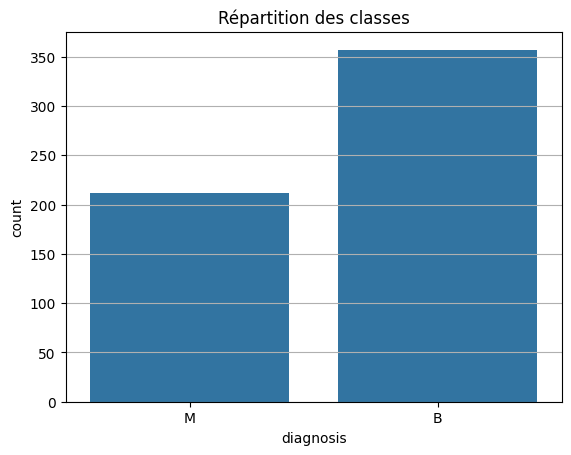

In [128]:
sns.countplot(x=df["diagnosis"], data=df)
plt.title("Répartition des classes")
plt.grid(True, axis="y")
plt.show()

### change label's type --> move to preparation 

In [129]:
df["diagnosis"].dtype

dtype('O')

In [130]:
df["diagnosis"].astype("str")
df["num_diagnosis"] = np.where(df["diagnosis"] == "M",1,0 )
df["num_diagnosis"].dtype
df_num = df.drop(["id","diagnosis"],axis=1)


In [131]:
features = df.columns.drop(["id","diagnosis","num_diagnosis"])
len(features)

30

### histplot of the features

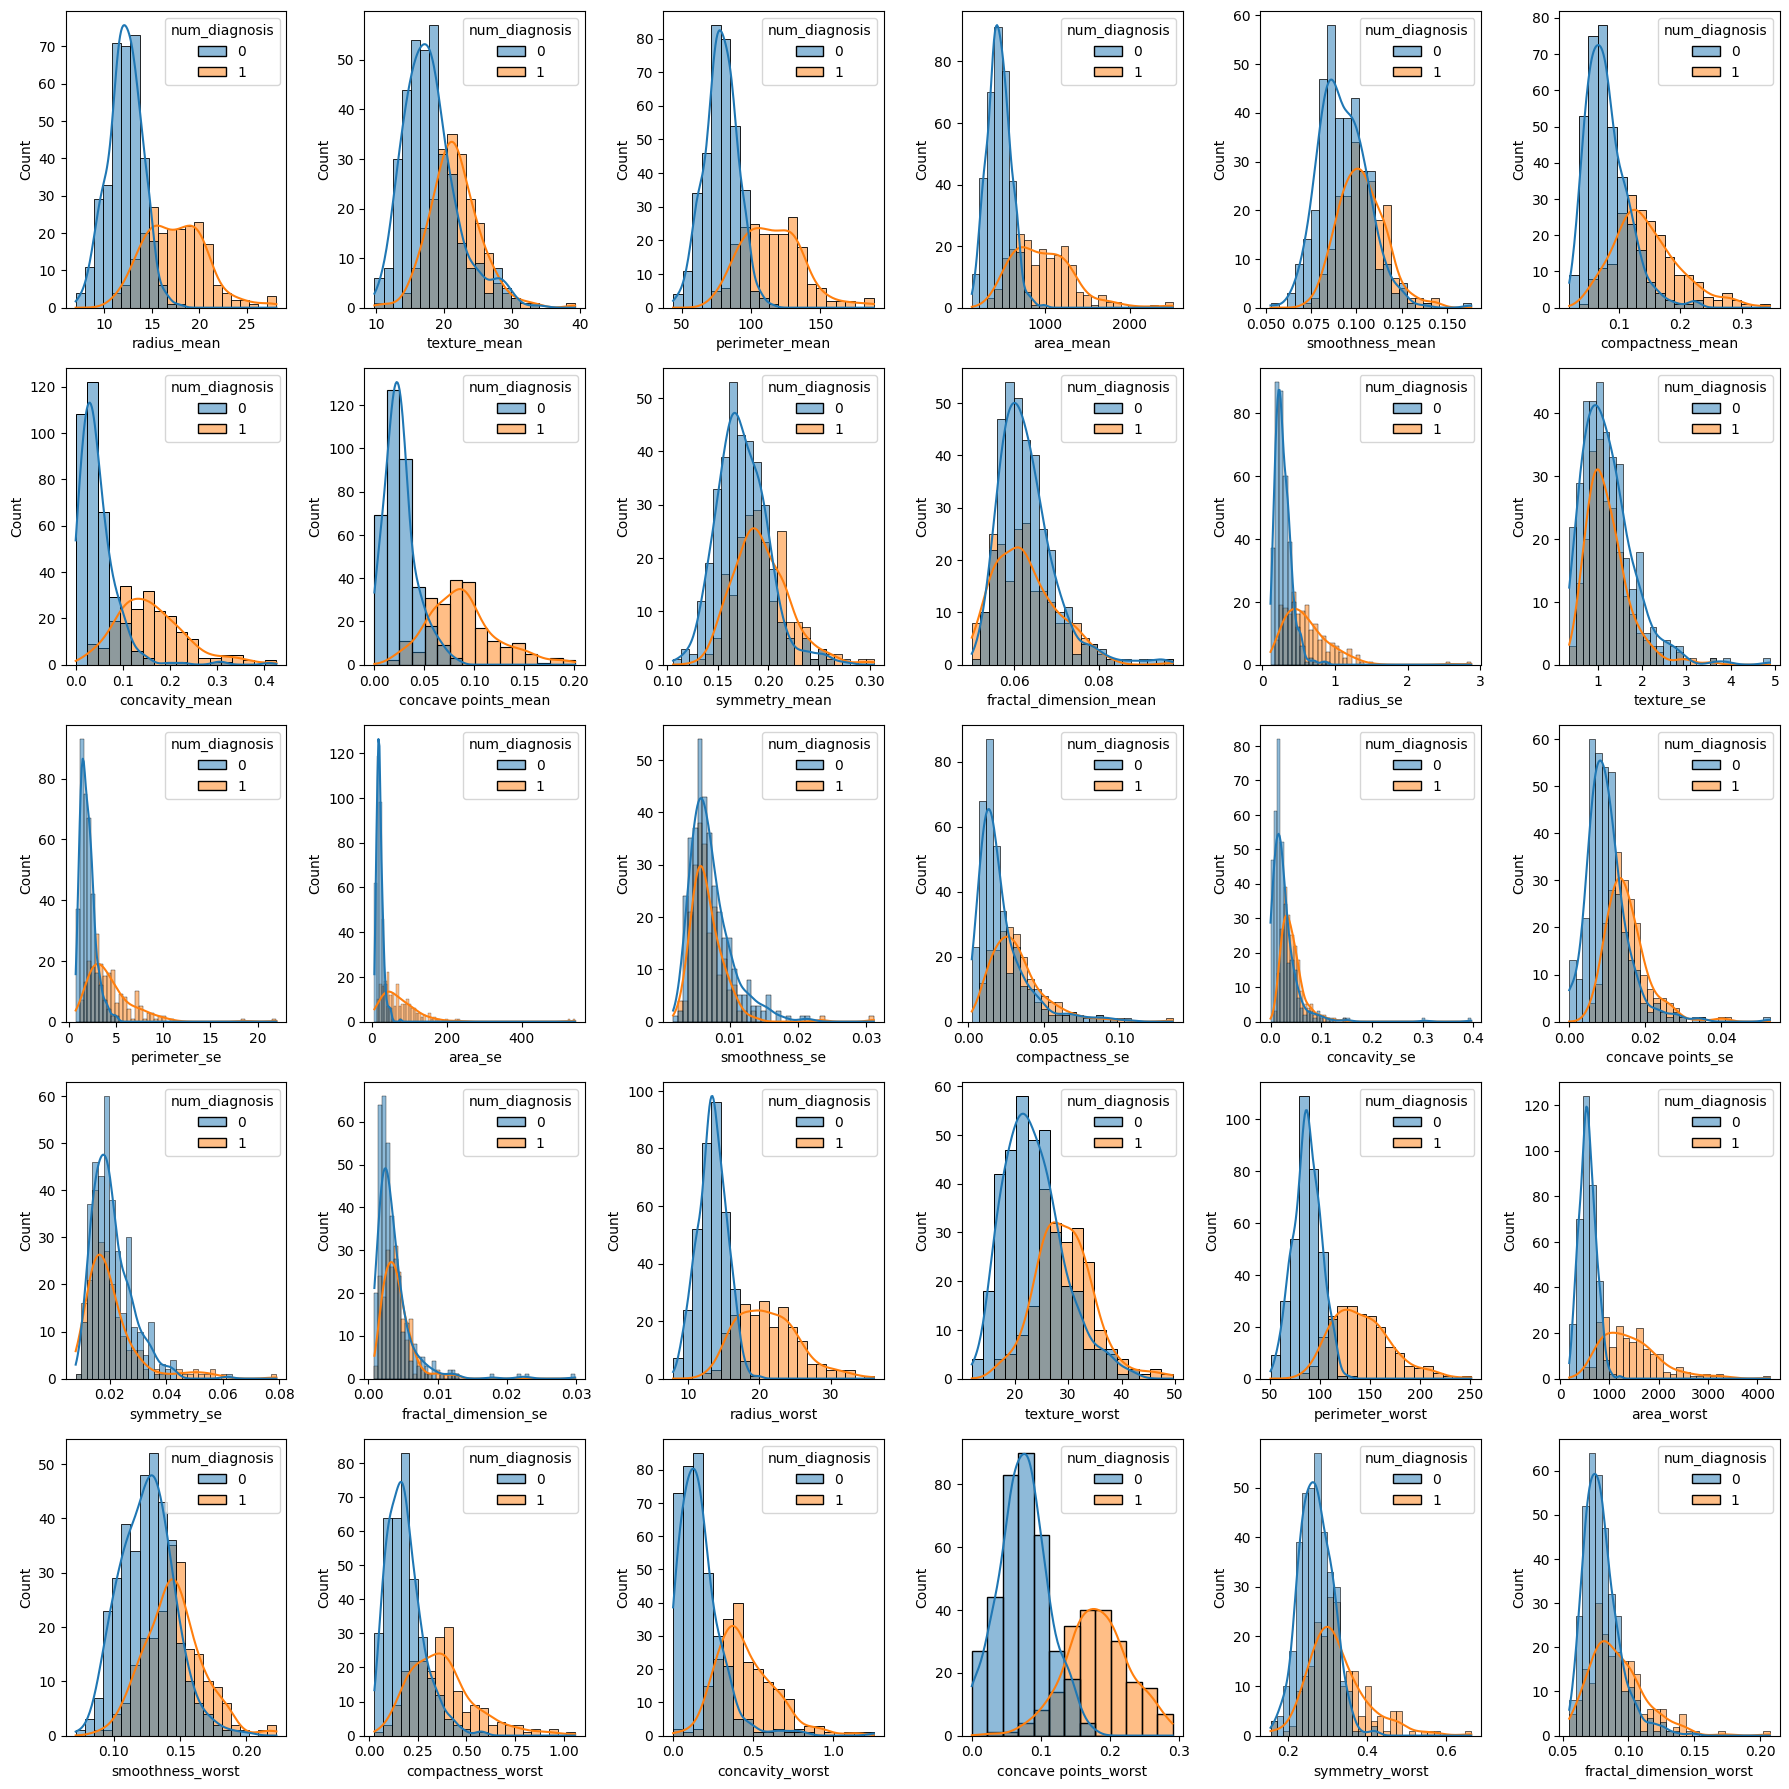

In [132]:
plt.figure(figsize=(18,18))
for i, col in enumerate(features, 1):
    plt.subplot(5, 6, i)
    sns.histplot(data=df_num, x=col, hue="num_diagnosis", kde=True)
   
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### heatmap of correlation

<Axes: >

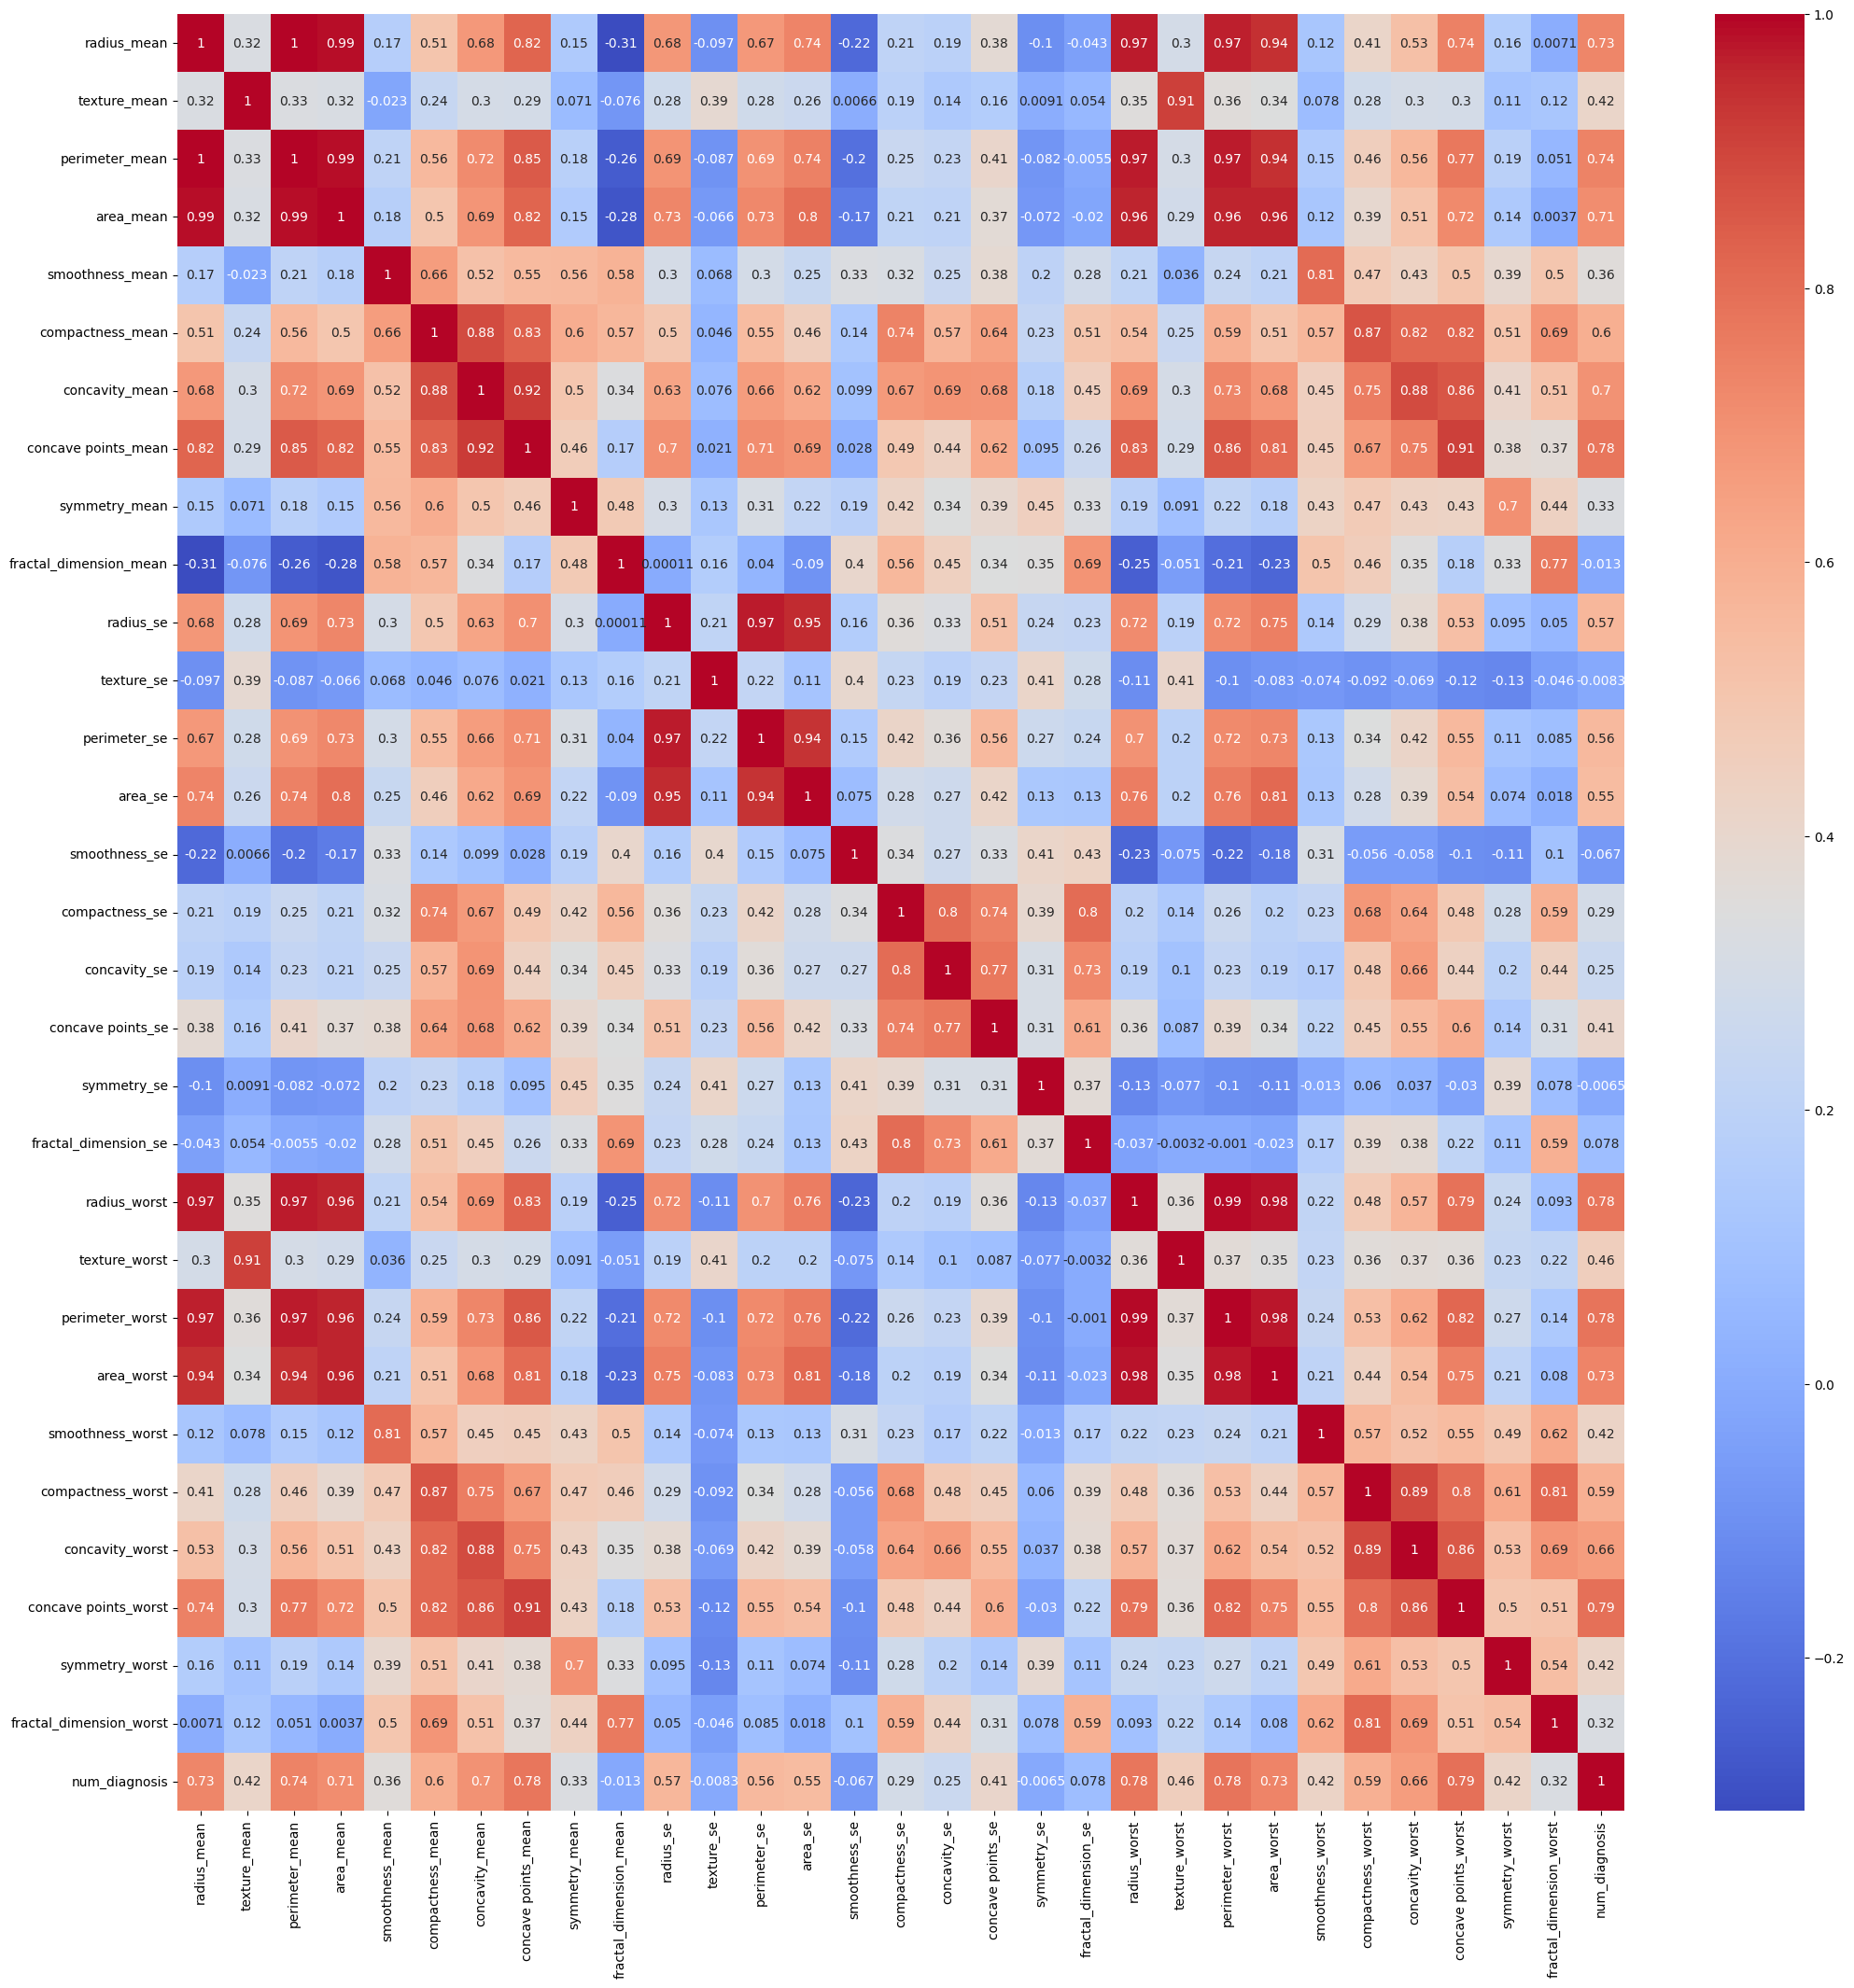

In [133]:
plt.figure(figsize=(25, 25))
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm")

In [134]:
dict_corr = {}
for col in features:
    dict_corr[col] = df_num["num_diagnosis"].corr(df_num[col])
    
dict_corr

{'radius_mean': np.float64(0.7300285113754558),
 'texture_mean': np.float64(0.41518529984520386),
 'perimeter_mean': np.float64(0.7426355297258322),
 'area_mean': np.float64(0.7089838365853893),
 'smoothness_mean': np.float64(0.35855996508593174),
 'compactness_mean': np.float64(0.5965336775082526),
 'concavity_mean': np.float64(0.696359707171905),
 'concave points_mean': np.float64(0.7766138400204347),
 'symmetry_mean': np.float64(0.3304985542625468),
 'fractal_dimension_mean': np.float64(-0.012837602698432373),
 'radius_se': np.float64(0.5671338208247171),
 'texture_se': np.float64(-0.008303332973877425),
 'perimeter_se': np.float64(0.5561407034314826),
 'area_se': np.float64(0.5482359402780236),
 'smoothness_se': np.float64(-0.06701601057948725),
 'compactness_se': np.float64(0.29299924424885787),
 'concavity_se': np.float64(0.25372976598083014),
 'concave points_se': np.float64(0.4080423327165041),
 'symmetry_se': np.float64(-0.006521755870647959),
 'fractal_dimension_se': np.float

In [135]:
sorted_by_values = dict(sorted(dict_corr.items(), key=lambda item: item[1],reverse=True))
print(sorted_by_values)

{'concave points_worst': np.float64(0.7935660171412692), 'perimeter_worst': np.float64(0.7829141371737585), 'concave points_mean': np.float64(0.7766138400204347), 'radius_worst': np.float64(0.7764537785950386), 'perimeter_mean': np.float64(0.7426355297258322), 'area_worst': np.float64(0.7338250349210506), 'radius_mean': np.float64(0.7300285113754558), 'area_mean': np.float64(0.7089838365853893), 'concavity_mean': np.float64(0.696359707171905), 'concavity_worst': np.float64(0.6596102103692327), 'compactness_mean': np.float64(0.5965336775082526), 'compactness_worst': np.float64(0.5909982378417913), 'radius_se': np.float64(0.5671338208247171), 'perimeter_se': np.float64(0.5561407034314826), 'area_se': np.float64(0.5482359402780236), 'texture_worst': np.float64(0.45690282139679794), 'smoothness_worst': np.float64(0.4214648610664021), 'symmetry_worst': np.float64(0.41629431104861864), 'texture_mean': np.float64(0.41518529984520386), 'concave points_se': np.float64(0.4080423327165041), 'smoo

The heatmap of correlation shows a high correlation between the diagnosis and the following features where the correlation is higher than 0.5 

In [136]:
most_relevant_features = []
for key,value in sorted_by_values.items():
    if value > 0.5:
        most_relevant_features.append(key)
most_relevant_features

['concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean',
 'concavity_worst',
 'compactness_mean',
 'compactness_worst',
 'radius_se',
 'perimeter_se',
 'area_se']

In [137]:
len(most_relevant_features)

15

15 features !!! that's too much.
let's select from them !!! 
we study their correlation 

In [138]:
df_num_most_relevant_features = df[most_relevant_features]
df_num_most_relevant_features.head()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se
0,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0,0.3001,0.7119,0.27760,0.6656,1.0950,8.589,153.40
1,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0,0.0869,0.2416,0.07864,0.1866,0.5435,3.398,74.08
2,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0,0.1974,0.4504,0.15990,0.4245,0.7456,4.585,94.03
3,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1,0.2414,0.6869,0.28390,0.8663,0.4956,3.445,27.23
4,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0,0.1980,0.4000,0.13280,0.2050,0.7572,5.438,94.44


In [139]:
df_num_most_relevant_features.describe()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.114606,107.261213,0.048919,16.269190,91.969033,880.583128,14.127292,654.889104,0.088799,0.272188,0.104341,0.254265,0.405172,2.866059,40.337079
std,0.065732,33.602542,0.038803,4.833242,24.298981,569.356993,3.524049,351.914129,0.079720,0.208624,0.052813,0.157336,0.277313,2.021855,45.491006
min,0.000000,50.410000,0.000000,7.930000,43.790000,185.200000,6.981000,143.500000,0.000000,0.000000,0.019380,0.027290,0.111500,0.757000,6.802000
25%,0.064930,84.110000,0.020310,13.010000,75.170000,515.300000,11.700000,420.300000,0.029560,0.114500,0.064920,0.147200,0.232400,1.606000,17.850000
50%,0.099930,97.660000,0.033500,14.970000,86.240000,686.500000,13.370000,551.100000,0.061540,0.226700,0.092630,0.211900,0.324200,2.287000,24.530000
75%,0.161400,125.400000,0.074000,18.790000,104.100000,1084.000000,15.780000,782.700000,0.130700,0.382900,0.130400,0.339100,0.478900,3.357000,45.190000
max,0.291000,251.200000,0.201200,36.040000,188.500000,4254.000000,28.110000,2501.000000,0.426800,1.252000,0.345400,1.058000,2.873000,21.980000,542.200000


In [140]:
df_num_most_relevant_features.corr()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se
concave points_worst,1.000000,0.816322,0.910155,0.787424,0.771241,0.747419,0.744214,0.722017,0.861323,0.855434,0.815573,0.801080,0.531062,0.554897,0.538166
perimeter_worst,0.816322,1.000000,0.855923,0.993708,0.970387,0.977578,0.965137,0.959120,0.729565,0.618344,0.590210,0.529408,0.719684,0.721031,0.761213
concave points_mean,0.910155,0.855923,1.000000,0.830318,0.850977,0.809630,0.822529,0.823269,0.921391,0.752399,0.831135,0.667454,0.698050,0.710650,0.690299
radius_worst,0.787424,0.993708,0.830318,1.000000,0.969476,0.984015,0.969539,0.962746,0.688236,0.573975,0.535315,0.475820,0.715065,0.697201,0.757373
perimeter_mean,0.771241,0.970387,0.850977,0.969476,1.000000,0.941550,0.997855,0.986507,0.716136,0.563879,0.556936,0.455774,0.691765,0.693135,0.744983
area_worst,0.747419,0.977578,0.809630,0.984015,0.941550,1.000000,0.941082,0.959213,0.675987,0.543331,0.509604,0.438296,0.751548,0.730713,0.811408
radius_mean,0.744214,0.965137,0.822529,0.969539,0.997855,0.941082,1.000000,0.987357,0.676764,0.526911,0.506124,0.413463,0.679090,0.674172,0.735864
area_mean,0.722017,0.959120,0.823269,0.962746,0.986507,0.959213,0.987357,1.000000,0.685983,0.512606,0.498502,0.390410,0.732562,0.726628,0.800086
concavity_mean,0.861323,0.729565,0.921391,0.688236,0.716136,0.675987,0.676764,0.685983,1.000000,0.884103,0.883121,0.754968,0.631925,0.660391,0.617427
concavity_worst,0.855434,0.618344,0.752399,0.573975,0.563879,0.543331,0.526911,0.512606,0.884103,1.000000,0.816275,0.892261,0.380585,0.418899,0.385100


<Axes: >

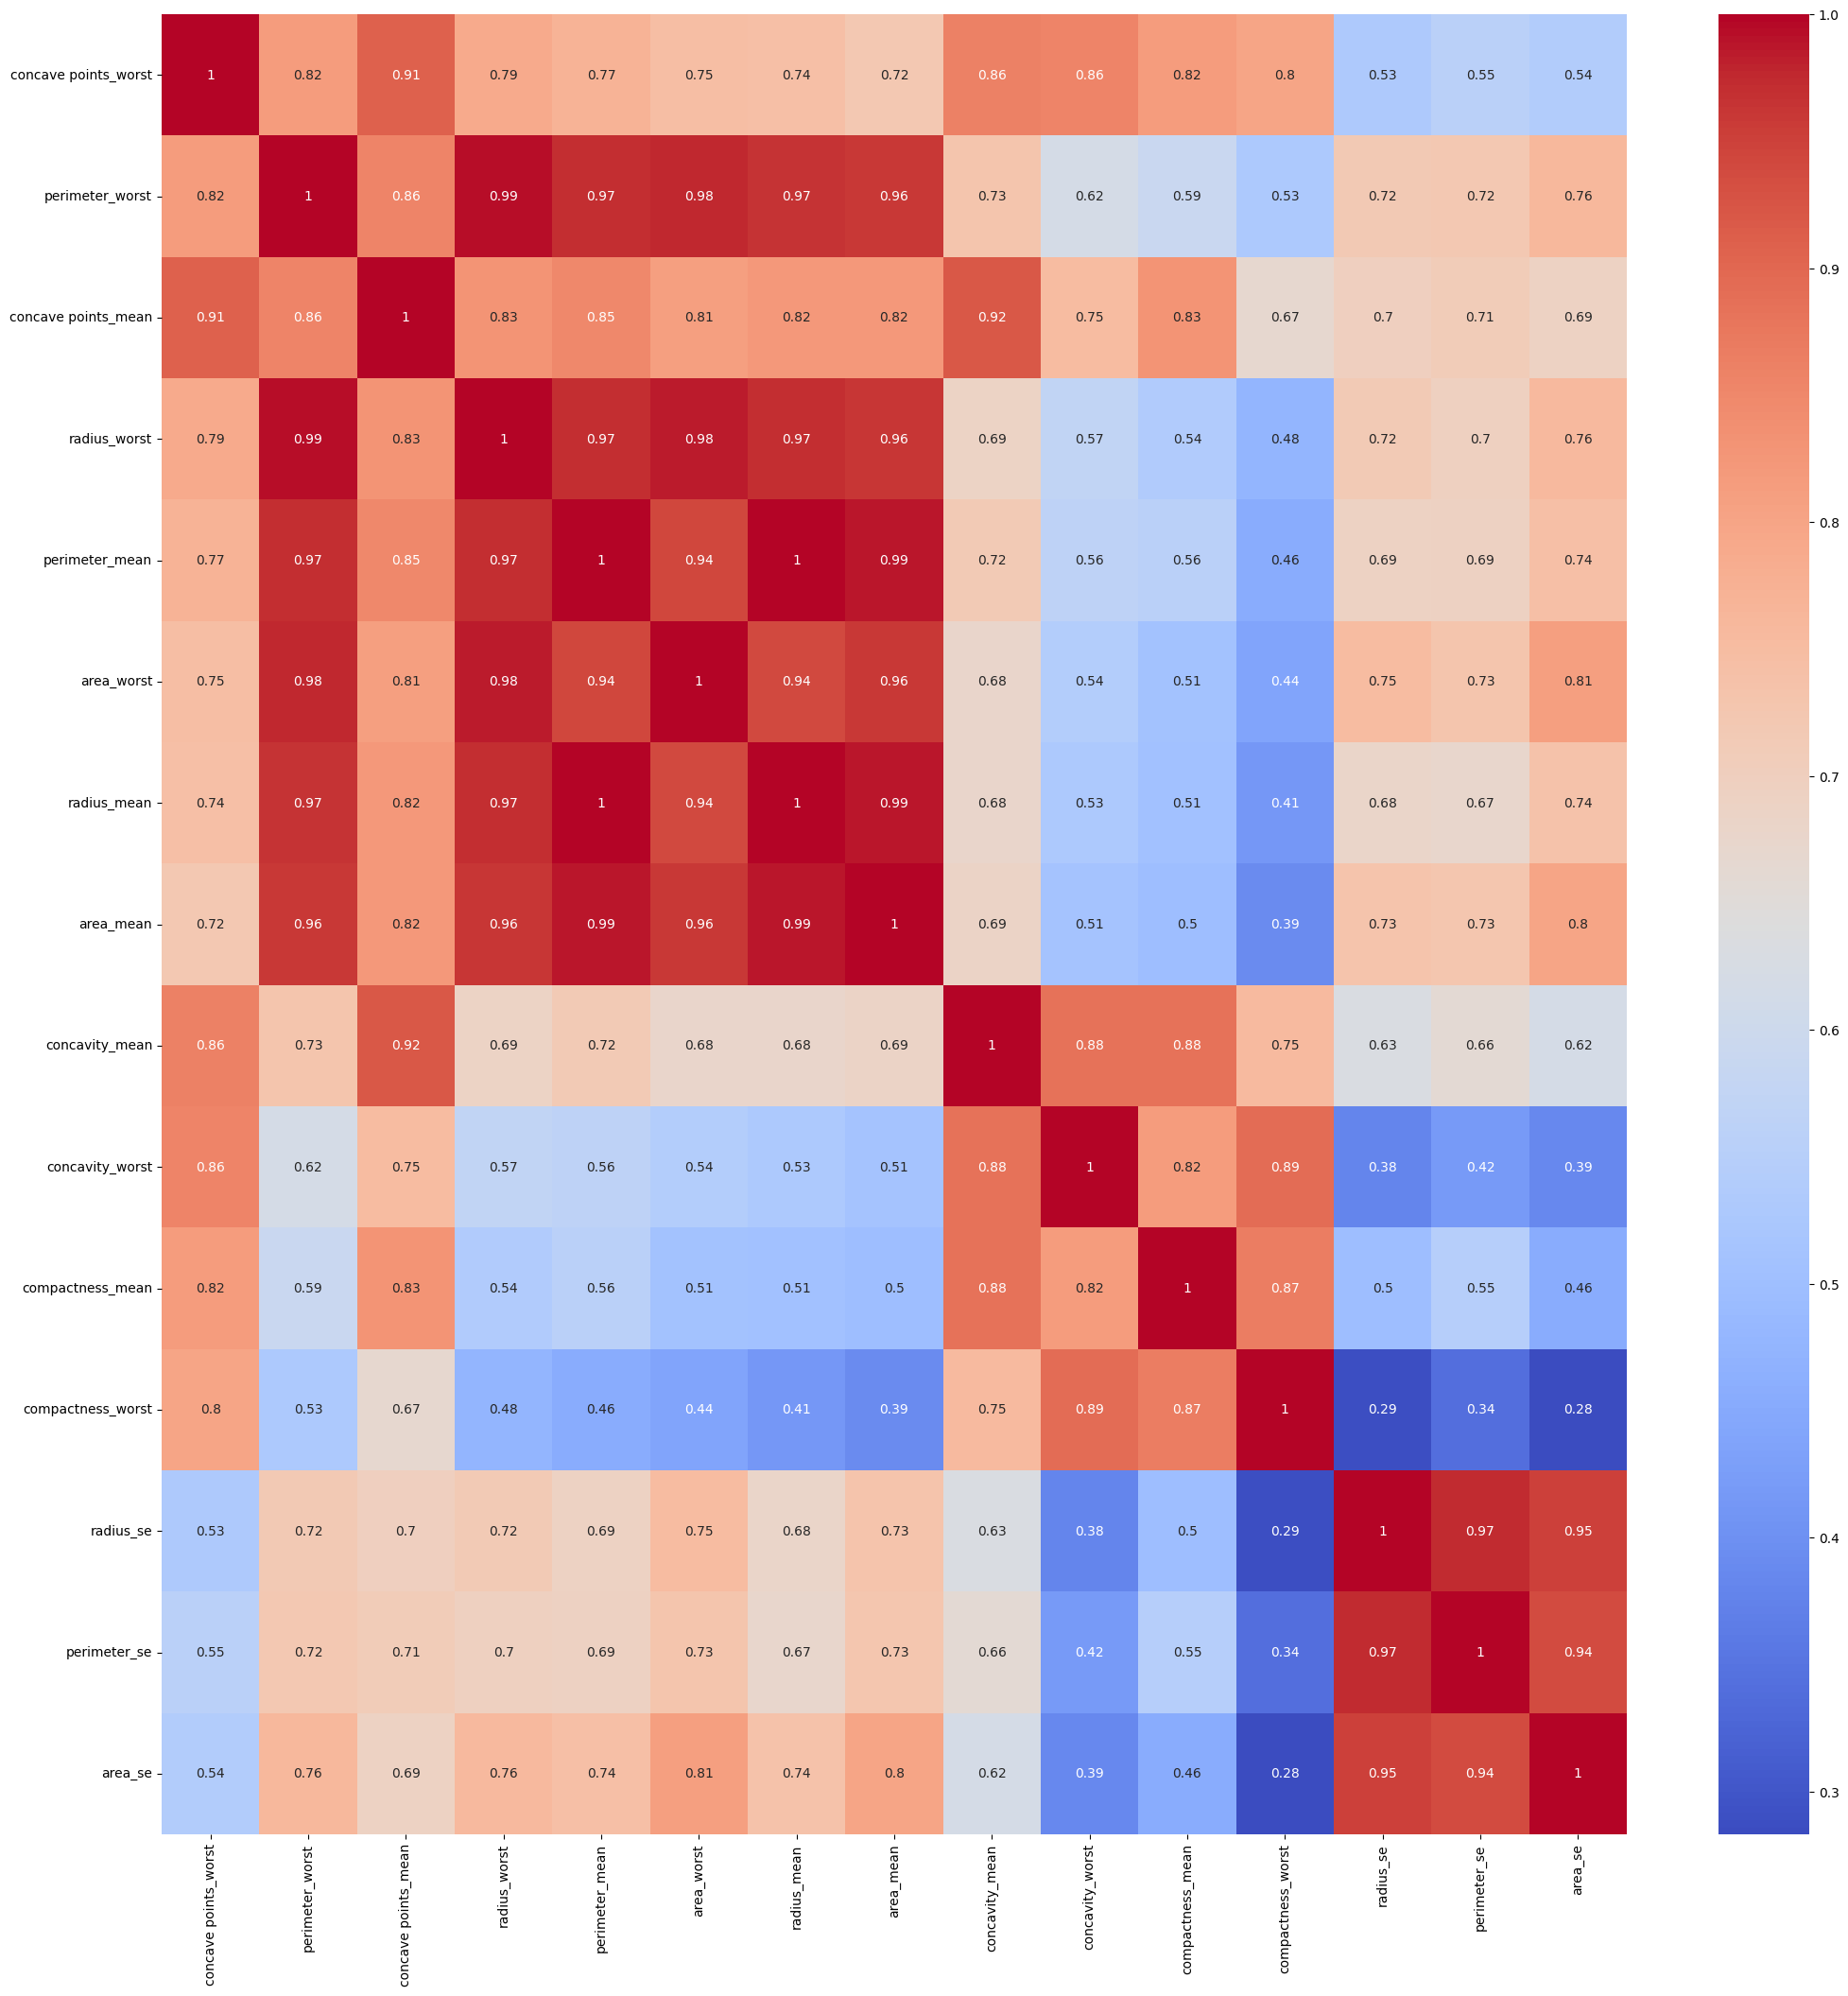

In [141]:
plt.figure(figsize=(25, 25))
sns.heatmap(df_num_most_relevant_features.corr(), annot=True, cmap="coolwarm")

In [142]:
most_relevant_features_inversed = most_relevant_features[::-1]
most_relevant_features_inversed


['area_se',
 'perimeter_se',
 'radius_se',
 'compactness_worst',
 'compactness_mean',
 'concavity_worst',
 'concavity_mean',
 'area_mean',
 'radius_mean',
 'area_worst',
 'perimeter_mean',
 'radius_worst',
 'concave points_mean',
 'perimeter_worst',
 'concave points_worst']

In [143]:
if 'radius_se' != 'radius_se':
    print("what")

In [144]:
features_to_elimanate = []
for col in most_relevant_features_inversed:
    num_col_correlated = 0
    col_correlated = []
    
    for other_col in most_relevant_features:
        if col != other_col: 
            if df_num_most_relevant_features[col].corr(df_num_most_relevant_features[other_col])> 0.9:
               num_col_correlated += 1 
               col_correlated.append(other_col)
    if num_col_correlated > 0:
        features_to_elimanate.append(col)           
    print(f" for {col} there is {num_col_correlated} : {col_correlated}")

print("list of cols to eliminate",len(features_to_elimanate))
            
            
        

 for area_se there is 2 : ['radius_se', 'perimeter_se']
 for perimeter_se there is 2 : ['radius_se', 'area_se']
 for radius_se there is 2 : ['perimeter_se', 'area_se']
 for compactness_worst there is 0 : []
 for compactness_mean there is 0 : []
 for concavity_worst there is 0 : []
 for concavity_mean there is 1 : ['concave points_mean']
 for area_mean there is 5 : ['perimeter_worst', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean']
 for radius_mean there is 5 : ['perimeter_worst', 'radius_worst', 'perimeter_mean', 'area_worst', 'area_mean']
 for area_worst there is 5 : ['perimeter_worst', 'radius_worst', 'perimeter_mean', 'radius_mean', 'area_mean']
 for perimeter_mean there is 5 : ['perimeter_worst', 'radius_worst', 'area_worst', 'radius_mean', 'area_mean']
 for radius_worst there is 5 : ['perimeter_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean']
 for concave points_mean there is 2 : ['concave points_worst', 'concavity_mean']
 for perimeter_worst ther

In [145]:
features_X = [col for col in most_relevant_features if col not in features_to_elimanate]

In [146]:
features_X

['concavity_worst', 'compactness_mean', 'compactness_worst']

# Préparation des données :
    - Traitement des valeurs manquantes sinécessaire
	- **Transformation des variables catégorielles** (`diagnosis`)
	- **Création éventuelle de nouvelles features**
	- Standardisation si nécessaire
    - Séparation train/test

In [147]:
df_num_most_relevant_features.isna().any().sum()

np.int64(0)

In [148]:
df_num.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'num_diagnosis'],
      dtype='object')

In [149]:
df_num_most_relevant_features[features_X].describe()

,concavity_worst,compactness_mean,compactness_worst
count,569.000000,569.000000,569.000000
mean,0.272188,0.104341,0.254265
std,0.208624,0.052813,0.157336
min,0.000000,0.019380,0.027290
25%,0.114500,0.064920,0.147200
50%,0.226700,0.092630,0.211900
75%,0.382900,0.130400,0.339100
max,1.252000,0.345400,1.058000


In [150]:
X = df_num_most_relevant_features[features_X].values
y = df_num[['num_diagnosis']].values

In [151]:
X

array([[0.7119 , 0.2776 , 0.6656 ],
       [0.2416 , 0.07864, 0.1866 ],
       [0.4504 , 0.1599 , 0.4245 ],
       ...,
       [0.3403 , 0.1023 , 0.3094 ],
       [0.9387 , 0.277  , 0.8681 ],
       [0.     , 0.04362, 0.06444]], shape=(569, 3))

In [152]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

## Separation

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y, test_size=0.2, random_state=12 )

## Standardization

In [154]:
scaler_X = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Modélisation :
## Implémentation d’un modèle de régression logistique


In [155]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

c:\Users\User\Desktop\ML_challenge_logistic_regression_breast_cancer_wisconsin\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [156]:
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0])

# Évaluation du modèle :
## Calcul des métriques : accuracy, precision, recall, f1-score


In [157]:
model_accuracy = accuracy_score(y_test,y_pred)
model_precision = precision_score(y_test,y_pred)
model_recall = recall_score(y_test,y_pred)
model_f1_score = f1_score(y_test,y_pred)
print("model_accuracy", model_accuracy)
print("model_precision",model_precision)
print("model_recall",model_recall)
print("model_f1_score",model_f1_score)


model_accuracy 0.8245614035087719
model_precision 0.75
model_recall 0.7857142857142857
model_f1_score 0.7674418604651163


## Matrice de confusion 

In [158]:
conf_mat = confusion_matrix(y_test,y_pred)

<Axes: >

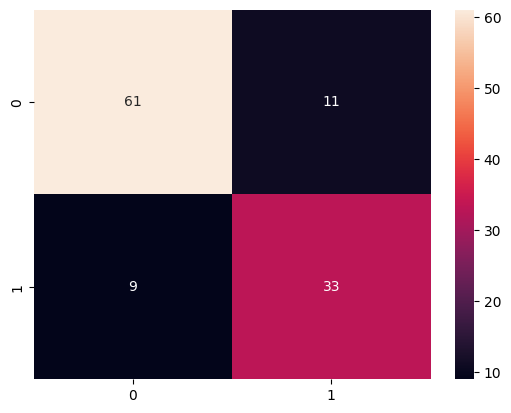

In [159]:
sns.heatmap(conf_mat,annot=True)

In [160]:
pd.crosstab(np.ravel(y_test),np.ravel(y_pred))

col_0,0,1
row_0,,
0,61,11
1,9,33


## Bonus : [Étudier AUC - ROC curve](https://www.w3schools.com/python/python_ml_auc_roc.asp)

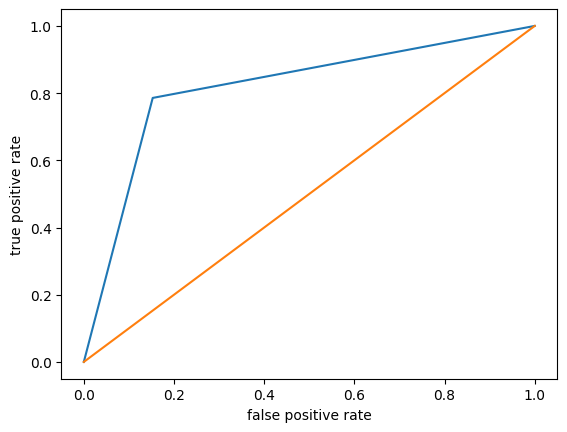

In [161]:
from sklearn.metrics import roc_auc_score,roc_curve


fpr,tpr,threshold = roc_curve(y_test,y_pred)
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [162]:
roc_auc_score(y_test,y_pred) 

np.float64(0.816468253968254)

 An AUC score closer to 1 means that the model has the ability to separate the two classes 

# Intégration simple du modèle dans un script interactif
    - Intégrer votre modèle dans un script Python simple qui permet à un utilisateur de faire une prédiction à partir de nouvelles données.

## Saving the model

In [163]:
joblib.dump({'model':model,'scaler_X':scaler_X}, 'modelscalerFile.pkl')

['modelscalerFile.pkl']

## Loading

In [164]:
# needed features_X ['concavity_worst', 'compactness_mean', 'compactness_worst']
# 0<'concavity_worst'<1.252000
# 0.019380 < 'compactness_mean' < 0.345400
# 0.027290 < 'compactness_worst' < 1.058000

loaded_model = joblib.load('modelscalerFile.pkl')['model']
loaded_scaler_X = joblib.load('modelscalerFile.pkl')['scaler_X']

input=np.array([[1,0.2,0.5]])

input_scaled = loaded_scaler_X.transform(input)
output = loaded_model.predict(input_scaled)
output[0]




np.int64(1)

## Bonus PCA : vous pouvez également étudier et appliquer une [réduction de dimension type PCA (Pricipal Component Analysis)](https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-de-donnees-exploratoire/5280368-comprenez-lenjeu-de-lanalyse-en-composantes-principales) si vous souhaitez automatiser le traitement de la redondance

In [165]:
df_num.shape

(569, 31)

In [166]:
X_train_scaled.shape

(455, 3)

In [171]:
from sklearn.decomposition import PCA

# Let's say, components = 2
pca = PCA(n_components=3)
x_pca_train = pca.fit_transform(X_train_scaled)
x_pca_test = pca.transform(X_test_scaled)

In [172]:
x_pca_test

array([[ 1.71533443e-01,  2.34383518e-01,  2.27980828e-02],
       [-1.30226452e+00, -2.75638211e-01,  7.20056303e-02],
       [-2.00637657e+00,  1.55297560e-01, -1.11156894e-01],
       [-2.16873670e+00, -2.65654038e-02,  4.31473187e-02],
       [-8.84240720e-01, -1.42268889e-01, -2.25277888e-02],
       [-1.42007318e-01,  1.71403259e-01,  5.05335781e-01],
       [ 1.71096202e+00, -8.25808673e-02, -1.64426997e-01],
       [-1.87172831e-01, -4.25005775e-01, -8.97838366e-02],
       [ 2.65400336e-01,  1.48207715e-01, -5.11613867e-01],
       [-1.03208010e+00,  5.01366161e-01,  9.61967094e-02],
       [ 1.94516209e+00, -1.29640949e-01,  3.32150728e-01],
       [-1.20231848e+00, -1.87404451e-01,  1.78029649e-01],
       [ 2.07053071e-01,  3.90694344e-01, -1.02513670e-01],
       [-2.16689276e-01, -5.06741043e-02,  9.11144235e-02],
       [-8.14172175e-01, -2.37700650e-01, -8.53857687e-03],
       [-1.91230286e+00,  1.21566682e-01,  2.13575711e-01],
       [-1.48887112e+00,  4.72248121e-01

In [173]:
x_pca_test.shape

(114, 3)

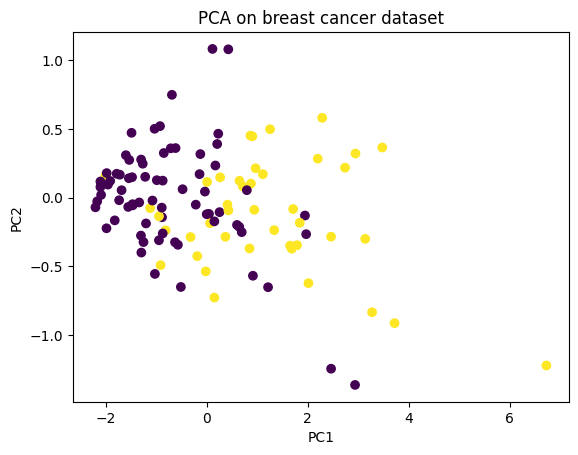

In [175]:
# Plot
plt.scatter(x_pca_test[:, 0], x_pca_test[:, 1], c=y_test)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on breast cancer dataset')
plt.show()

In [176]:
print(pca.explained_variance_ratio_)
print(pca.components_)


[0.90486987 0.06293774 0.03219239]
[[ 0.57437372  0.57033283  0.58720975]
 [-0.65623043  0.7496217  -0.08619127]
 [-0.48934288 -0.3358389   0.80483276]]


In [177]:
y_pred_pca = model.predict(x_pca_test)

In [178]:
y_pred_pca.reshape(-1,1).shape

(114, 1)

In [179]:
y_test.shape

(114, 1)

In [180]:
model_accuracy_pca = accuracy_score(y_test,y_pred_pca.reshape(-1,1))
model_precision_pca = precision_score(y_test,y_pred_pca.reshape(-1,1))
model_recall_pca = recall_score(y_test,y_pred_pca.reshape(-1,1))
model_f1_score_pca = f1_score(y_test,y_pred_pca.reshape(-1,1))
print("model_accuracy", model_accuracy_pca)
print("model_precision",model_precision_pca)
print("model_recall",model_recall_pca)
print("model_f1_score",model_f1_score_pca)

model_accuracy 0.7807017543859649
model_precision 0.6888888888888889
model_recall 0.7380952380952381
model_f1_score 0.7126436781609196


<Axes: >

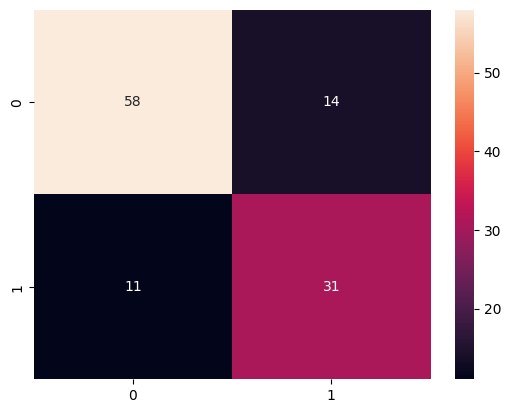

In [181]:
conf_mat_pca = confusion_matrix(y_test,y_pred_pca)
sns.heatmap(conf_mat_pca,annot=True)

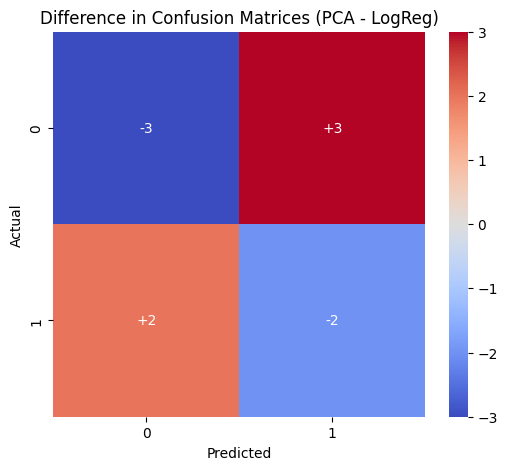

In [182]:
diff_cm = conf_mat_pca - conf_mat  # Model 2 minus Model 1

plt.figure(figsize=(6, 5))
sns.heatmap(diff_cm, annot=True, fmt="+d", center=0, cmap="coolwarm")
plt.title("Difference in Confusion Matrices (PCA - LogReg)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()